### Zip Code

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np  
import csv 
import datetime as dt

In [2]:
zillow_11 = pd.read_csv('./Resources/Zip_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
zillow_11.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,976021.0,...,1945737.0,1930647.0,1918358.0,1912831.0,1904208.0,1895108.0,1886062.0,1879163.0,1873173.0,1870230.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,257828.0,...,604460.0,602894.0,601747.0,600820.0,600775.0,601909.0,603650.0,604449.0,604373.0,604344.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,3248843.0,3247636.0,3244888.0,3226986.0,3218341.0,3211534.0,3215118.0,3205961.0,3206874.0,3206229.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,139236.0,...,255970.0,256194.0,256470.0,256662.0,256558.0,256533.0,256835.0,257802.0,258828.0,259490.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,320113.0,...,708596.0,707481.0,706163.0,704821.0,704312.0,703897.0,703822.0,702134.0,700427.0,698181.0
5,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,89329.0,...,174743.0,175343.0,176290.0,177147.0,177575.0,177986.0,179019.0,180286.0,181338.0,181788.0
6,61616,6,10002,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1439766.0,1431212.0,1431172.0,1430522.0,1432109.0,1426185.0,1425784.0,1430174.0,1432071.0,1434027.0
7,91733,7,77084,Zip,TX,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,89148.0,...,171870.0,172404.0,173070.0,173724.0,174024.0,174551.0,175470.0,176566.0,177474.0,178114.0
8,93144,8,79936,Zip,TX,TX,El Paso,El Paso,El Paso County,80521.0,...,131696.0,131823.0,132035.0,132569.0,133164.0,133568.0,133721.0,133746.0,133621.0,133458.0
9,84640,9,60640,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,202573.0,...,415975.0,415813.0,415115.0,415307.0,415336.0,415765.0,416048.0,415954.0,415681.0,415218.0


In [3]:
df_3bdr=pd.melt(zillow_11,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City','Metro', 'CountyName']) 
df_3bdr.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1996-01-31,976021.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,257828.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1996-01-31,NaN
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,139236.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,320113.0
5,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,89329.0
6,61616,6,10002,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1996-01-31,NaN
7,91733,7,77084,Zip,TX,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,89148.0
8,93144,8,79936,Zip,TX,TX,El Paso,El Paso,El Paso County,1996-01-31,80521.0
9,84640,9,60640,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,202573.0


In [4]:
df_3bdr["type"]="3-bdr"
df_3bdr["variable"]=df_1bdr["variable"].astype('datetime64[m]')
df_3bdr["epoch"] = (df_1bdr["variable"] - dt.datetime(1970,1,1)).dt.total_seconds()
df_3bdr=df_3bdr.dropna(how="any")
df_3bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,type,epoch
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1996-01-31,976021.0,1-bdr,8.230464e+08
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,257828.0,1-bdr,8.230464e+08
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,139236.0,1-bdr,8.230464e+08
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,320113.0,1-bdr,8.230464e+08
5,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,89329.0,1-bdr,8.230464e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8491008,98400,34430,95721,Zip,CA,CA,Twin Bridges,Sacramento--Roseville--Arden-Arcade,El Dorado County,2020-06-30,314431.0,1-bdr,1.593475e+09
8491009,71534,34430,31421,Zip,GA,GA,Savannah,Savannah,Chatham County,2020-06-30,388518.0,1-bdr,1.593475e+09
8491011,69846,34430,28310,Zip,NC,NC,Fayetteville,Fayetteville,Cumberland County,2020-06-30,38536.0,1-bdr,1.593475e+09
8491012,77449,34430,45114,Zip,OH,OH,Wilmington,Wilmington,Clinton County,2020-06-30,101857.0,1-bdr,1.593475e+09


In [5]:
df_3bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,type,epoch
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1996-01-31,976021.0,1-bdr,8.230464e+08
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,257828.0,1-bdr,8.230464e+08
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,139236.0,1-bdr,8.230464e+08
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,320113.0,1-bdr,8.230464e+08
5,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,89329.0,1-bdr,8.230464e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8491008,98400,34430,95721,Zip,CA,CA,Twin Bridges,Sacramento--Roseville--Arden-Arcade,El Dorado County,2020-06-30,314431.0,1-bdr,1.593475e+09
8491009,71534,34430,31421,Zip,GA,GA,Savannah,Savannah,Chatham County,2020-06-30,388518.0,1-bdr,1.593475e+09
8491011,69846,34430,28310,Zip,NC,NC,Fayetteville,Fayetteville,Cumberland County,2020-06-30,38536.0,1-bdr,1.593475e+09
8491012,77449,34430,45114,Zip,OH,OH,Wilmington,Wilmington,Clinton County,2020-06-30,101857.0,1-bdr,1.593475e+09


In [6]:
X11=df_3bdr["variable"].values.reshape(-1,1)
y11=df_3bdr["value"].values.reshape(-1,1)

X22=df_3bdr["epoch"].values.reshape(-1,1)
y22=df_3bdr["value"].values.reshape(-1,1)

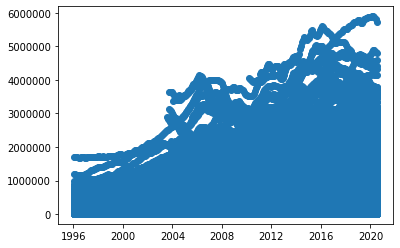

In [7]:
plt.scatter(X11,y11)

In [8]:
# Prediction 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X22, y22, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
model
X_test

array([[1.5539904e+09],
       [1.0939104e+09],
       [1.1911104e+09],
       ...,
       [1.3436928e+09],
       [1.4173056e+09],
       [1.5462144e+09]])

In [10]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score
### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# ### END SOLUTION

Mean Squared Error (MSE): 38912732758.832985
R-squared (R2 ): 0.020342946256948213


In [11]:
model.predict(np.array([1596662122]).reshape(-1, 1))

array([[248571.62404522]])

## schools_data

In [12]:
schools_data= pd.read_csv('./Resources/number-of-schools.csv')
schools_data.head(10)

,index,objectid,city,state,zip,county
0,0,2002,NEW SMYRNA,FL,32168,VOLUSIA
1,1,2003,WOODWORTH,LA,71485,RAPIDES
2,2,2004,BRUNSWICK,ME,4011,CUMBERLAND
3,3,2005,CARTHAGE,MS,39051,LEAKE
4,4,2006,KEARNEY,MO,64060,CLAY
5,5,2007,LINCOLN,NE,68516,LANCASTER
6,6,2008,LAS VEGAS,NV,89121,CLARK
7,7,2009,LAS VEGAS,NV,89141,CLARK
8,8,2010,ATLANTIC CITY,NJ,8401,ATLANTIC
9,9,2011,WESTFIELD,NJ,7090,UNION


In [13]:
nc_schols=schools_data[schools_data['state']=='NC']


In [14]:
nc_schols_df=nc_schols.groupby("zip")["objectid"].count().reset_index(name="count")
nc_schols_df


,zip,count
0,27006,2
1,27011,3
2,27012,4
3,27013,2
4,27014,1
...,...,...
620,28806,12
621,28901,3
622,28904,3
623,28905,1


In [15]:
nc_df_3bdr=df_3bdr[df_3bdr['State']=='NC']
nc_df_3bdr.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,type,epoch
32,69816,33,28269,Zip,NC,NC,Charlotte,Charlotte-Concord-Gastonia,Mecklenburg County,1996-01-31,116625.0,1-bdr,823046400.0
55,69823,56,28277,Zip,NC,NC,Charlotte,Charlotte-Concord-Gastonia,Mecklenburg County,1996-01-31,154490.0,1-bdr,823046400.0
85,69672,86,28027,Zip,NC,NC,Concord,Charlotte-Concord-Gastonia,Cabarrus County,1996-01-31,123352.0,1-bdr,823046400.0
139,69431,140,27587,Zip,NC,NC,Wake Forest,Raleigh,Wake County,1996-01-31,155561.0,1-bdr,823046400.0
184,69699,186,28078,Zip,NC,NC,Huntersville,Charlotte-Concord-Gastonia,Mecklenburg County,1996-01-31,136982.0,1-bdr,823046400.0
189,69450,191,27610,Zip,NC,NC,Raleigh,Raleigh,Wake County,1996-01-31,118902.0,1-bdr,823046400.0
192,69340,194,27410,Zip,NC,NC,Greensboro,Greensboro-High Point,Guilford County,1996-01-31,128093.0,1-bdr,823046400.0
198,69336,200,27406,Zip,NC,NC,Greensboro,Greensboro-High Point,Guilford County,1996-01-31,92693.0,1-bdr,823046400.0
213,69849,215,28314,Zip,NC,NC,Fayetteville,Fayetteville,Cumberland County,1996-01-31,85603.0,1-bdr,823046400.0
319,69275,321,27284,Zip,NC,NC,Kernersville,Winston-Salem,Forsyth County,1996-01-31,107020.0,1-bdr,823046400.0


In [16]:


nc_df_3bdr=nc_df_3bdr.groupby(["City","RegionName"])["value"].mean().reset_index(name="avg")
nc_df_3bdr

,City,RegionName,avg
0,Aberdeen,28315,152390.688776
1,Advance,27006,203515.118280
2,Albemarle,28001,112205.683673
3,Alexander,28701,202563.962963
4,Alexis,28006,139996.357143
...,...,...,...
628,Yadkinville,27055,122836.272727
629,Youngsville,27596,165427.655290
630,Zebulon,27597,147983.479592
631,Zionville,28698,174710.979592


In [17]:
merge_data=pd.merge(nc_df_3bdr,nc_schols_df,left_on="RegionName",right_on="zip")


In [18]:
merge_data



,City,RegionName,avg,zip,count
0,Aberdeen,28315,152390.688776,28315,4
1,Advance,27006,203515.118280,27006,2
2,Albemarle,28001,112205.683673,28001,8
3,Angier,27501,137745.621528,27501,5
4,Apex,27502,215726.292517,27502,7
...,...,...,...,...,...
502,Wrightsville Beach,28480,867084.654762,28480,1
503,Yadkinville,27055,122836.272727,27055,4
504,Youngsville,27596,165427.655290,27596,3
505,Zebulon,27597,147983.479592,27597,5


In [26]:


merge_data["City_catagory"] = merge_data["City"].astype('category').cat.codes

merge_data

,City,RegionName,avg,zip,count,City_catagory
0,Aberdeen,28315,152390.688776,28315,4,0
1,Advance,27006,203515.118280,27006,2,1
2,Albemarle,28001,112205.683673,28001,8,2
3,Angier,27501,137745.621528,27501,5,3
4,Apex,27502,215726.292517,27502,7,4
...,...,...,...,...,...,...
502,Wrightsville Beach,28480,867084.654762,28480,1,380
503,Yadkinville,27055,122836.272727,27055,4,381
504,Youngsville,27596,165427.655290,27596,3,382
505,Zebulon,27597,147983.479592,27597,5,383


In [30]:
X=merge_data[['City_catagory','count']]
y=merge_data["avg"].values.reshape(-1,1)


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [33]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [34]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.01980104294292473
Testing Score: -0.03666440279010641


Mean Squared Error (MSE): 9128120720.210428
R-squared (R2 ): -0.03666440279010641


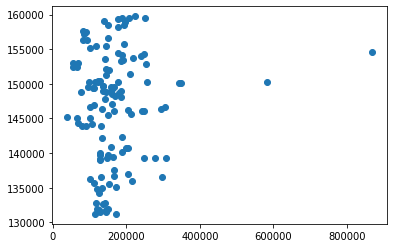

In [35]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score
### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# ### END SOLUTION
plt.scatter(y_test,predicted)

Text(0.5, 1.0, 'Residual Plot')

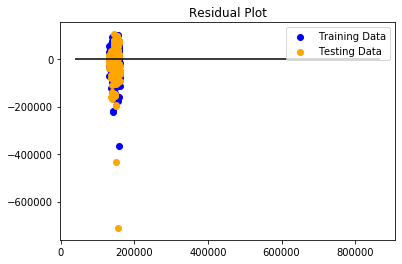

In [36]:

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


## income_data

In [37]:
income_data = pd.read_csv('./Resources/rw_census_data.csv')
income_data.head(10)

,population,poverty_count,median_household_income,zipcode,poverty_rate
0,17242.0,10772.0,13092.0,601,62.475351
1,38442.0,19611.0,16358.0,602,51.014515
2,48814.0,24337.0,16603.0,603,49.856599
3,6437.0,4163.0,12832.0,606,64.672984
4,27073.0,11724.0,19309.0,610,43.305138
5,60303.0,28547.0,18171.0,612,47.339270
6,10765.0,5388.0,16018.0,616,50.051092
7,23974.0,11879.0,16735.0,617,49.549512
8,6578.0,3309.0,15206.0,622,50.304044
9,42427.0,22617.0,16280.0,623,53.308035


In [38]:
merge_data2=pd.merge(merge_data,income_data,left_on="RegionName",right_on="zipcode")

merge_data2

,City,RegionName,avg,zip,count,City_catagory,population,poverty_count,median_household_income,zipcode,poverty_rate
0,Aberdeen,28315,152390.688776,28315,4,0,13700.0,2826.0,51725.0,28315,20.627737
1,Advance,27006,203515.118280,27006,2,1,14555.0,932.0,78095.0,27006,6.403298
2,Albemarle,28001,112205.683673,28001,8,2,26601.0,5208.0,45121.0,28001,19.578211
3,Angier,27501,137745.621528,27501,5,3,21299.0,2601.0,56338.0,27501,12.211841
4,Apex,27502,215726.292517,27502,7,4,40280.0,2248.0,110513.0,27502,5.580933
...,...,...,...,...,...,...,...,...,...,...,...
498,Wrightsville Beach,28480,867084.654762,28480,1,380,2536.0,216.0,83417.0,28480,8.517350
499,Yadkinville,27055,122836.272727,27055,4,381,14131.0,1855.0,44574.0,27055,13.127167
500,Youngsville,27596,165427.655290,27596,3,382,18359.0,1624.0,70535.0,27596,8.845798
501,Zebulon,27597,147983.479592,27597,5,383,23538.0,2995.0,58514.0,27597,12.724106


In [47]:
X=merge_data2[["City_catagory","population","median_household_income","count", "poverty_rate"]]
y=merge_data2["avg"].values.reshape(-1,1)


In [48]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)



In [49]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [50]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.27196175009997614
Testing Score: 0.11934752965802564


In [51]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score
### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# ### END SOLUTION

Mean Squared Error (MSE): 6760610115.466273
R-squared (R2 ): 0.11934752965802564


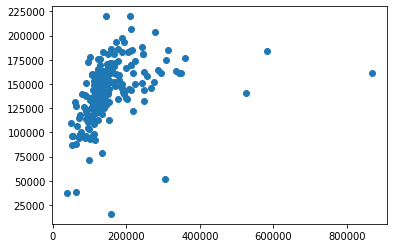

In [52]:
plt.scatter(y_test,predicted)

In [53]:
y_test

array([[111749.43197279],
       [342611.14965986],
       [142198.81412639],
       [129781.05782313],
       [192448.85164835],
       [ 76686.54273504],
       [101460.43554007],
       [120796.94217687],
       [149473.25510204],
       [116159.06122449],
       [141049.60869565],
       [108743.18378378],
       [143901.57671958],
       [129456.57823129],
       [125919.19727891],
       [ 99986.46258503],
       [867084.6547619 ],
       [161547.4981685 ],
       [ 74175.20408163],
       [ 94539.43877551],
       [140838.1462585 ],
       [118242.42176871],
       [193619.97153025],
       [ 55438.87890625],
       [114918.1292517 ],
       [119756.27210884],
       [ 74342.1043956 ],
       [ 48398.68442623],
       [170945.08503401],
       [132283.92176871],
       [112502.43542435],
       [105458.74489796],
       [189530.15675676],
       [121015.63369963],
       [112205.68367347],
       [ 65473.6969697 ],
       [123121.45238095],
       [249163.94265233],
       [ 625

In [54]:
predicted

array([[108467.5666835 ],
       [161385.57812306],
       [158848.49282945],
       [140352.29924189],
       [140939.93276007],
       [100254.70758523],
       [135091.05594687],
       [150009.29305682],
       [166176.95861827],
       [157142.84168163],
       [142170.80229011],
       [128926.8034411 ],
       [128400.07840985],
       [169730.16667966],
       [123626.16322864],
       [ 92977.44405694],
       [160880.79192224],
       [165073.56700406],
       [ 98002.88463823],
       [104785.59399409],
       [132805.20953668],
       [131758.89786177],
       [139376.7183419 ],
       [ 96127.09409438],
       [ 91754.70492869],
       [123498.50390965],
       [117887.61717568],
       [109186.37723648],
       [193767.790053  ],
       [127990.48255252],
       [ 98083.18824281],
       [117977.44818361],
       [145961.63843838],
       [158325.39487267],
       [132235.31605758],
       [106263.74187768],
       [112868.82490695],
       [144216.67709285],
       [ 882

In [55]:
merge_data2.to_csv('merged_data.csv', index=False, header=True)

Text(0.5, 1.0, 'Residual Plot')

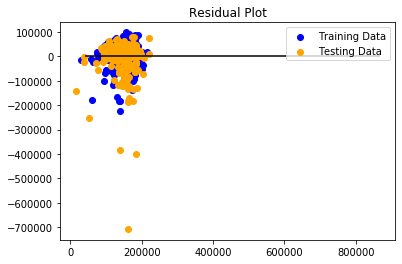

In [56]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")